**<font color = 'blue' size = 38> MACHINE LEARNING</font>**


# <font color='Orange'>Polynomial Regression</font>
link: https://www.kaggle.com/akram24/position-salaries

## <font color = 'Orange'>Data Preparation</font>

In [6]:
import pandas as pd
import numpy as np


data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/Position_Salaries.csv')

In [7]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


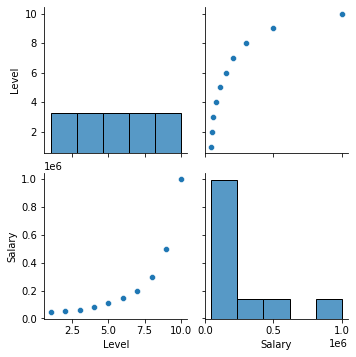

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(data)

In [9]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:2].values
Y = data.iloc[:,2:3].values
X_train, X_test, Y_train, Y_test = train_test_split(
    data.iloc[:,1:2].values, data.iloc[:,2:3].values, test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
Y_train=scaler.fit_transform(Y_train)
Y_test=scaler.fit_transform(Y_test)

## <font color = 'Orange'>Building the Model</font>

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 


poly_reg = PolynomialFeatures(4)

#call fit_transform on the x variables.
X_poly = poly_reg.fit_transform(X_train)

#now fit the transformed x's to the y's
poly_reg.fit(X_poly, Y_train)

#create an object of the class LinearRegression
lin_reg = LinearRegression()

#fit the model to our transformed X
lin_reg.fit(X_poly, Y_train)

X_test_poly = poly_reg.fit_transform(X_test)
y_pred=lin_reg.predict(X_test_poly)
training_score=mean_squared_error (Y_train,lin_reg.predict(X_poly))
test_score=mean_squared_error(Y_test,y_pred)
print("MSE for the training Dataset: " + str(training_score))
print("MSE for the testing Dataset: " +  str(test_score))

MSE for the training Dataset: 0.0007681482184650496
MSE for the testing Dataset: 0.2716426214391702


## <font color = 'Orange'>Evaluationg Model</font>

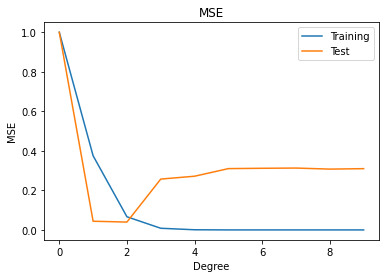

In [12]:
train = []
test = []
for i in range(0,10):
    poly=PolynomialFeatures(degree=i, )
    X_poly=poly.fit_transform(X_train)
    l=LinearRegression()
    l.fit(X_poly,Y_train)
    
    X_test_poly =poly.fit_transform(X_test)
    y_pred=l.predict(X_test_poly)
    training_score=mean_squared_error (Y_train,l.predict(X_poly))
    test_score=mean_squared_error(Y_test,y_pred)
    train.append(training_score)
    test.append(test_score)

x=np.arange(10)
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE");
plt.show()

## <font color='Orange'>Ridge regularization & Cross Validation</font>

In [13]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.kernel_ridge import KernelRidge
# define model
model = KernelRidge(alpha=0.003, kernel='poly', degree=4, gamma=1, coef0=1)
# define model evaluation method
cv = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))
model.fit(X_train,Y_train)
y_pred = model.predict(Y_test)

print("MSE for the training Dataset: " + str(training_score))
print("MSE for the testing Dataset: " +  str(test_score))

Mean MAE: 0.253 (0.306)
MSE for the training Dataset: 5.7266563931382264e-30
MSE for the testing Dataset: 0.30993800138493816


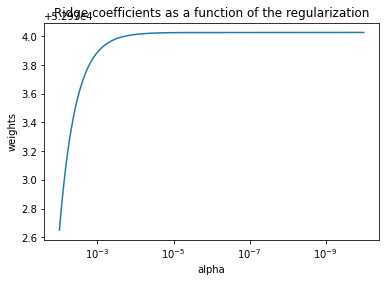

In [14]:
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_[0][0])

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

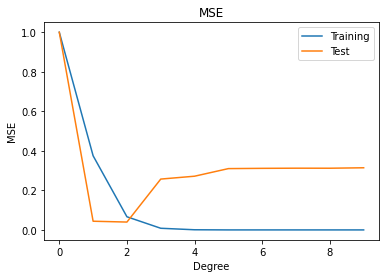

In [15]:
train = []
test = []
for i in range(0,10):
    model = KernelRidge(alpha=0.002, kernel='poly', degree=i, gamma=1, coef0=1)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    training_score=mean_squared_error (Y_train,model.predict(X_train))
    test_score=mean_squared_error(Y_test,y_pred)
    train.append(training_score)
    test.append(test_score)

x=np.arange(10)
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE");
plt.show()

## <font color='Orange'>Visualizing the Regression</font>

In [16]:
poly_reg = PolynomialFeatures(4)

#call fit_transform on the x variables.
X_poly = poly_reg.fit_transform(X_train)

#now fit the transformed x's to the y's
poly_reg.fit(X_poly, Y_train)

#create an object of the class LinearRegression
lin_reg = LinearRegression()

#fit the model to our transformed X
lin_reg.fit(X_poly, Y_train)

LinearRegression()

In [17]:
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

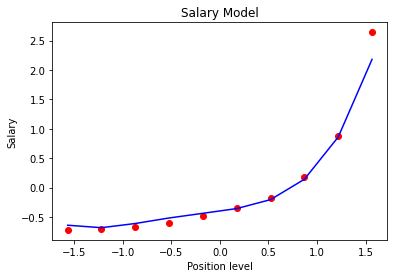

In [18]:
#create a scatter plot with x and y.
plt.scatter(X, Y, color = 'red')
#plot the predictions as a blue line.
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
#axes and title labels.
plt.title('Salary Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
#show the completed plot
plt.show()
    

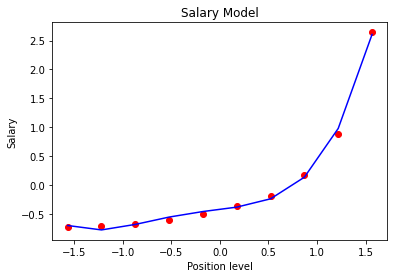

In [19]:
model = KernelRidge(alpha=0.003, kernel='poly', degree=4, gamma=1, coef0=1)
model.fit(X,Y)
#create a scatter plot with x and y.
plt.scatter(X, Y, color = 'red')
#plot the predictions as a blue line.
plt.plot(X, model.predict(X), color = 'blue')
#axes and title labels.
plt.title('Salary Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
#show the completed plot
plt.show()
    

# <font color = 'Orange'>Decision Tree</font>

## <font color = 'Orange'>Classification </font>
link: https://www.kaggle.com/raghupalem/bill_authentication

### <font color = 'Orange'>Data Preparation</font>

In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/bill_authentication.csv')

In [21]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


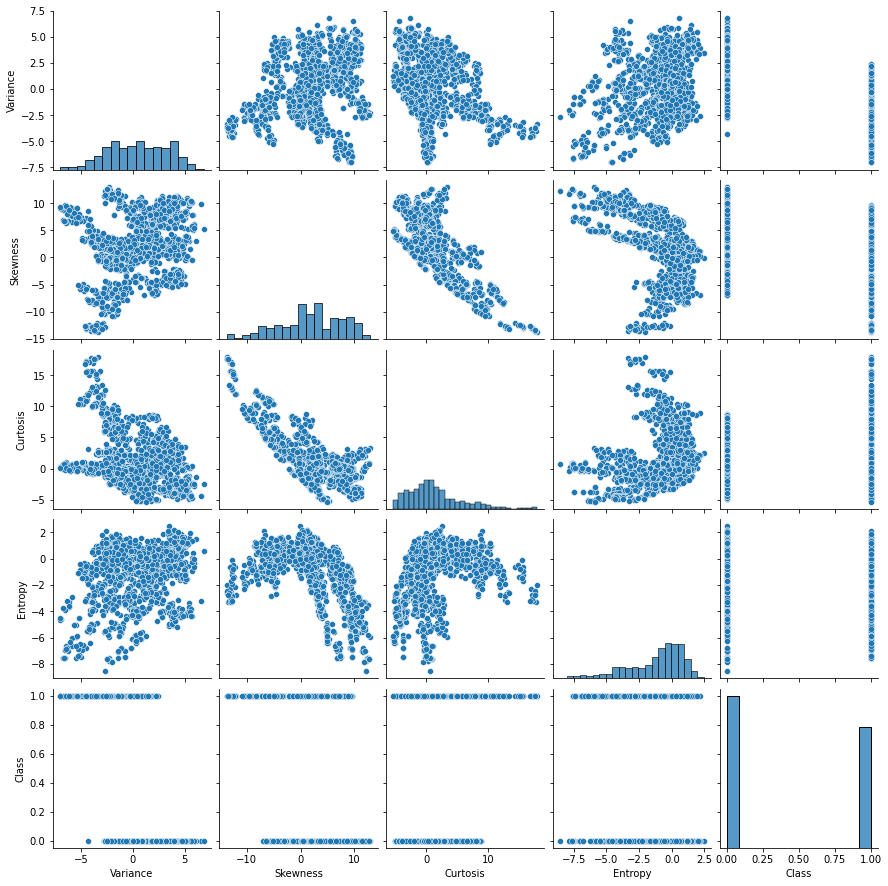

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(data)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

### <font color = 'Orange'>Building Decision Tree Model</font>

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### <font color = 'Orange'>Evaluating Model</font>

In [25]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.9854545454545455


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[157   0]
 [  4 114]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       157
           1       1.00      0.97      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



### <font color = 'Orange'>Visualizing Decision Trees</font>

In [27]:
!pip install graphviz

In [28]:
!pip install pydotplus



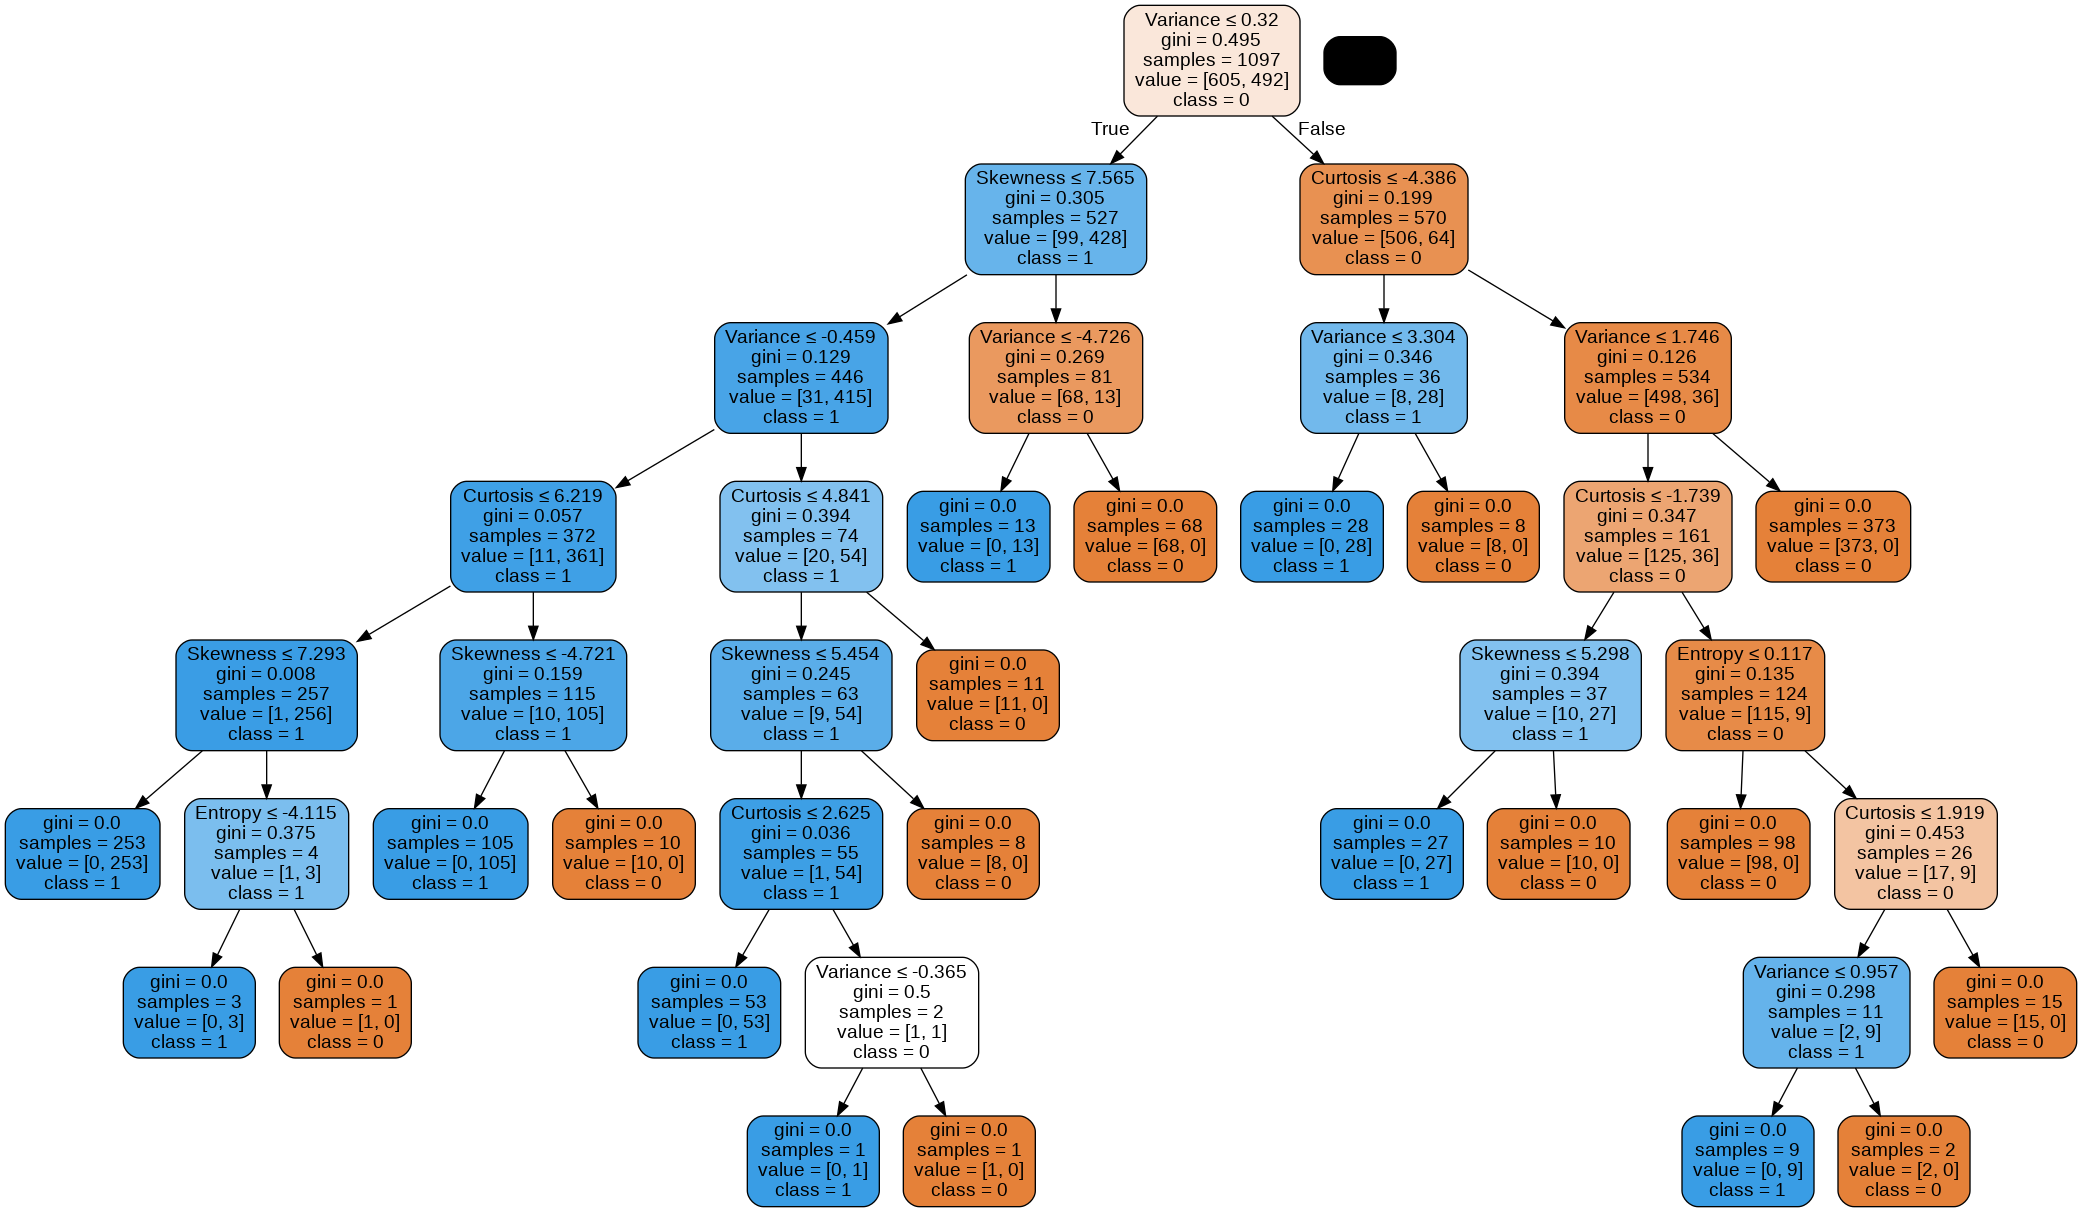

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### <font color = 'Orange'>Optimizing Decision Tree Performance</font>

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9527272727272728


In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: ignored

## <font color='Orange'>Regression</font>
We are going to obtain two different Datasets, the purpose is to show the main reason why the number of the rows(points) it's important and the second one is to show how the overfitting works in these examples.

First Dataset link: https://www.kaggle.com/akram24/position-salaries

Second Dataset link: https://www.kaggle.com/farhanmd29/50-startups

### <font color='Orange'>Data Preparation</font>

#### <font color = 'Orange'>First model</font>

In [34]:
data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/Position_Salaries.csv')

In [35]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


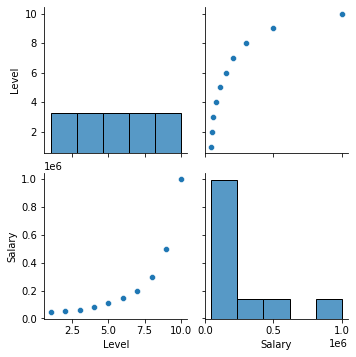

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(data)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[1:-1]],  data['Salary'], test_size=0.2)

In [38]:
#set independent variable by using all rows, but just column 1.
X_train = X_train.values
X_test = X_test.values
#set the dependent variable using all rows but only the last column. 
Y_train = Y_train.values
Y_test = Y_test.values

#### <font color = 'Orange'>Second model</font>

In [51]:
data2 = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/50_Startups.csv')

In [52]:
data2.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
data2 = data2.drop(columns=['State','Administration'])

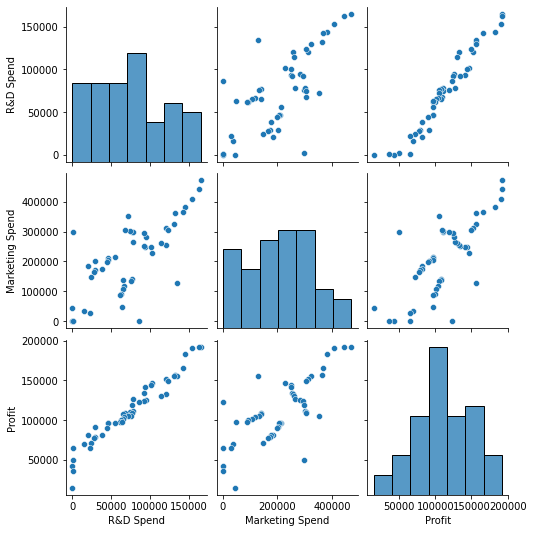

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(data2)

In [55]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    data2[data2.columns[:-1]],  data2['Profit'], test_size=0.2)

### <font color='Orange'>Building Decision Tree Regression Model</font>

#### <font color = 'Orange'>First model</font>

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree regressor object

regressor = DecisionTreeRegressor()

# Train Decision Tree Regressor
regressor.fit(X_train, Y_train)

# #Predict the response for test dataset
y_pred = regressor.predict(X_test)


#### <font color = 'Orange'>Second model</font>

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree regressor object

regressor2 = DecisionTreeRegressor()

# Train Decision Tree Regressor
regressor2.fit(X_train2, Y_train2)

# #Predict the response for test dataset
y_pred2 = regressor2.predict(X_test2)


### <font color = 'Orange'>Evaluating Model</font>

#### <font color = 'Orange'>First model</font>

In [62]:
print("Accuracy:",regressor.score(X_test, Y_test))


Accuracy: 0.30352941176470594


#### <font color = 'Orange'>Second model</font>

In [63]:

print("Accuracy:",regressor2.score(X_test2, Y_test2))


Accuracy: 0.857653409038407


It's obvius that the first model had just 8 points and that lead to overfitting like we can see the accuracy for the two points in the test part is 0.05, which means that the model is not appropriate. On the othe hand, the second model is showing good results.

### <font color='Orange'>Visualizing Decision Trees</font>

#### <font color = 'Orange'>First model</font>

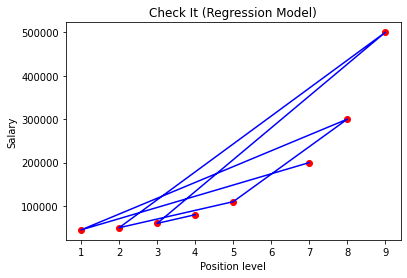

In [64]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

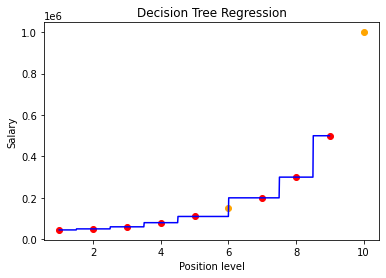

In [65]:
#Create a grid, necessary because of the veritical jumps.
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

#create a scatter plot
plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'orange')

#plot the X values and the predictions 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

#Titles and labels.
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

#Show the plot.
plt.show()


#### <font color = 'Orange'>Second model</font>

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


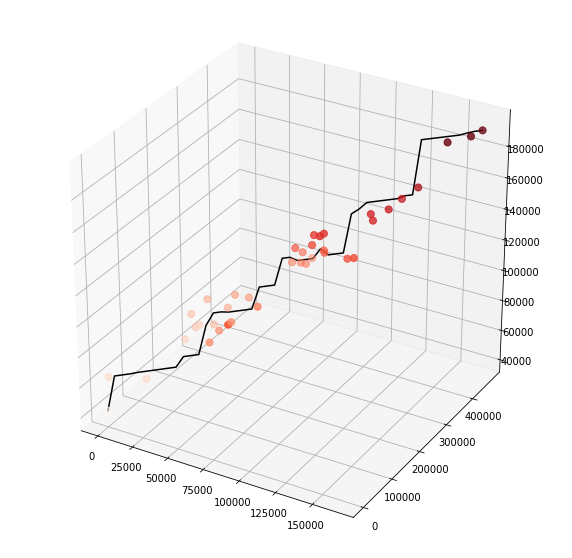

In [66]:
# First well create the 3d figure.
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

#Next well pull out the datapoints for each axis
zdata = Y_train2
xdata = X_train2.iloc[:,0]
ydata = X_train2.iloc[:, 1]
#Now we plot the points 
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s = 50);

#Next we need to make x and y dimensions for the data.
xline = np.linspace(min(xdata), max(xdata), 50)
yline = np.linspace(min(ydata), max(ydata), 50)
#combine those back into a dataset to apply the prediction on 
z = np.concatenate((xline.reshape(-1,1),yline.reshape(-1,1)), axis = 1)
#call the predictions 
zline = regressor2.predict(z)
#plot the resulting line. 
ax.plot3D(xline, yline, zline, 'black')